In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

housing=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

housing_labels = housing['SalePrice'].copy()
housing = housing.drop('SalePrice',axis=1)

train_len = len(housing)

num_atr=housing._get_numeric_data().columns
cat_atr = housing.select_dtypes(include='object').columns
concat_df = pd.concat([housing,test]).reset_index(drop=True)


<AxesSubplot:>

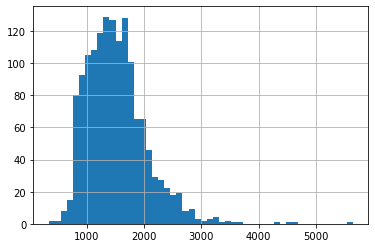

In [7]:
housing['GrLivArea'].hist(bins=50)

In [2]:
housing.isna().sum()[housing.isna().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

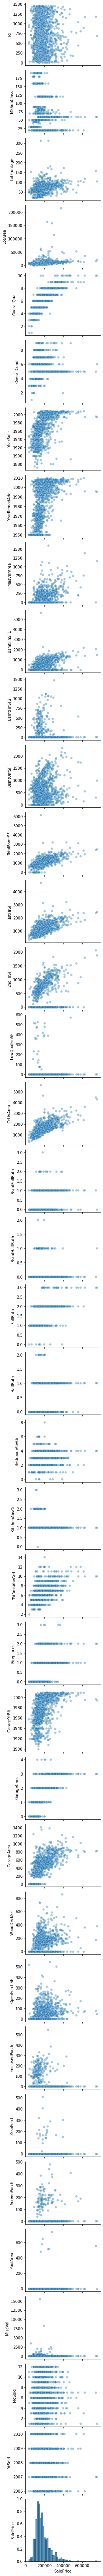

In [11]:
sns.pairplot(housing[num_atr],y_vars=num_atr,x_vars='SalePrice',aspect=1.5,plot_kws={'alpha': 0.4});

In [12]:
housing[num_atr]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [2]:
housing[num_atr].isna().sum()[housing[num_atr].isna().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [3]:
num_atr

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

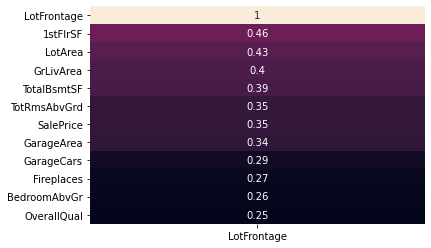

In [5]:
sns.heatmap(housing.corr()[['LotFrontage']].sort_values('LotFrontage',ascending=False)[:12], annot=True, cbar=False);

In [8]:
housing[cat_atr]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal


In [10]:
from sklearn.preprocessing import OneHotEncoder
enco = OneHotEncoder()
cat = enco.fit_transform(housing[cat_atr])

In [12]:
cat.shape

(1460, 268)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(housing, housing_label)

<AxesSubplot:xlabel='BldgType', ylabel='LotFrontage'>

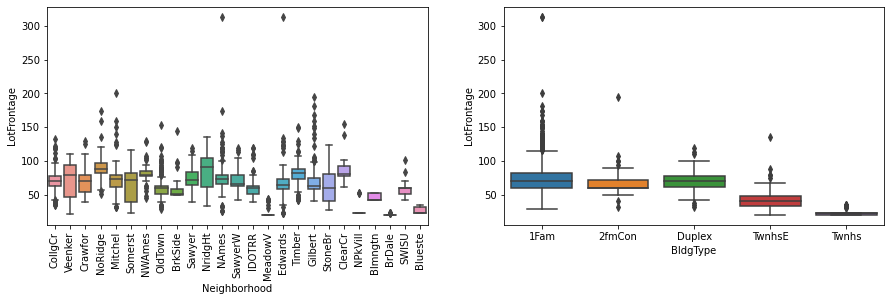

In [5]:
f,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].tick_params(axis='x', rotation=90)
sns.boxplot(data=concat_df, x='Neighborhood', y='LotFrontage',ax=ax[0])
sns.boxplot(data=concat_df, x='BldgType', y='LotFrontage',ax=ax[1])

In [6]:
ids = concat_df[concat_df['LotFrontage'].isna()]
ids

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,2848,20,RL,NaN,11088,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2850,2851,60,RL,NaN,21533,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal
2900,2901,20,RL,NaN,50102,Pave,NaN,IR1,Low,AllPub,...,138,0,NaN,NaN,NaN,0,3,2006,WD,Alloca
2901,2902,20,RL,NaN,8098,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [7]:
neigh_median = concat_df.groupby('Neighborhood')['LotFrontage'].median()
concat_df.loc[concat_df['LotFrontage'].isna(),'LotFrontage']=concat_df['Neighborhood'].map(neigh_median)

In [11]:
ids[['Neighborhood']]

,Neighborhood
7,NWAmes
12,Sawyer
14,NAmes
16,NAmes
24,Sawyer
...,...
2847,CollgCr
2850,CollgCr
2900,Timber
2901,Timber


In [13]:
ids.index

Int64Index([   7,   12,   14,   16,   24,   31,   42,   43,   50,   64,
            ...
            2814, 2815, 2818, 2839, 2845, 2847, 2850, 2900, 2901, 2908],
           dtype='int64', length=486)

In [3]:
pd.set_option('display.max_columns', 500)

In [25]:
concat_df.loc[ids.index,['LotFrontage','Neighborhood']].sort_values('Neighborhood')

,LotFrontage,Neighborhood
559,43.0,Blmngtn
2320,43.0,Blmngtn
851,43.0,Blmngtn
2672,43.0,Blmngtn
1984,43.0,Blmngtn
2673,43.0,Blmngtn
1985,43.0,Blmngtn
465,43.0,Blmngtn
1542,51.0,BrkSide
1443,51.0,BrkSide


In [84]:
concat_df[concat_df['MSZoning'].isna()]#['Neighborhood']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1915,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
2216,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
2250,2251,70,NaN,60.0,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
2904,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [83]:
concat_df.groupby(['Neighborhood','MSZoning']).count().loc[['IDOTRR','Mitchel']]#.sort_values(['Neighborhood','Id'], ascending=False)#.nlargest(1)

Id  MSSubClass  LotFrontage  LotArea  Street  Alley  \
Neighborhood MSZoning                                                         
IDOTRR       C (all)    22          22           22       22      22      3   
             RM         68          68           68       68      68     14   
Mitchel      RL        104         104          104      104     104      0   
             RM          9           9            9        9       9      0   

                       LotShape  LandContour  Utilities  LotConfig  LandSlope  \
Neighborhood MSZoning                                                           
IDOTRR       C (all)         22           22         22         22         22   
             RM              68           68         68         68         68   
Mitchel      RL             104          104        104        104        104   
             RM               9            9          9          9          9   

                       Condition1  Condition2  BldgType  HouseStyle  \
Neighborhood MSZoning                                                 
IDOTRR       C (all)           22          22        22          22   
             RM                68          68        68          68   
Mitchel      RL               104         104       104         104   
             RM                 9           9         9           9   

                       OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Neighborhood MSZoning                                                      
IDOTRR       C (all)            22           22         22            22   
             RM                 68           68         68            68   
Mitchel      RL                104          104        104           104   
             RM                  9            9          9             9   

                       RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
Neighborhood MSZoning                                                  
IDOTRR       C (all)          22        22           22           22   
             RM               68        68           68           68   
Mitchel      RL              104       104          104          104   
             RM                9         9            9            9   

                       MasVnrType  MasVnrArea  ExterQual  ExterCond  \
Neighborhood MSZoning                                                 
IDOTRR       C (all)           22          22         22         22   
             RM                68          68         68         68   
Mitchel      RL               103         104        104        104   
             RM                 9           9          9          9   

                       Foundation  BsmtQual  BsmtCond  BsmtExposure  \
Neighborhood MSZoning                                                 
IDOTRR       C (all)           22        19        21            21   
             RM                68        66        66            66   
Mitchel      RL               104       100       100           100   
             RM                 9         9         9             9   

                       BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
Neighborhood MSZoning                                                       
IDOTRR       C (all)             21          22            21          22   
             RM                  66          68            66          68   
Mitchel      RL                 100         104           100         104   
             RM                   9           9             9           9   

                       BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
Neighborhood MSZoning                                                           
IDOTRR       C (all)          22           22       22         22          22   
             RM               68           68       68         68          68   
Mitchel      RL              104          104      104        104         104   
             RM        

In [57]:
concat_df.groupby(['Neighborhood','MSZoning']).count()

Id  MSSubClass  LotFrontage  LotArea  Street  Alley  \
Neighborhood MSZoning                                                         
Blmngtn      RL         25          25           25       25      25      0   
             RM          3           3            3        3       3      0   
Blueste      RM         10          10           10       10      10      0   
BrDale       RM         30          30           30       30      30      0   
BrkSide      RL         43          43           43       43      43      8   
             RM         65          65           65       65      65      0   
ClearCr      RL         44          44           44       44      44      0   
CollgCr      RL        253         253          253      253     253      0   
             RM         14          14           14       14      14      0   
Crawfor      RH          2           2            2        2       2      0   
             RL         91          91           91       91      91      4   
             RM         10          10           10       10      10      0   
Edwards      RH          2           2            2        2       2      0   
             RL        180         180          180      180     180      9   
             RM         12          12           12       12      12      0   
Gilbert      RL        165         165          165      165     165      0   
IDOTRR       C (all)    22          22           22       22      22      3   
             RM         68          68           68       68      68     14   
MeadowV      RM         37          37           37       37      37      0   
Mitchel      RL        104         104          104      104     104      0   
             RM          9           9            9        9       9      0   
NAmes        RH          7           7            7        7       7      0   
             RL        436         436          436      436     436      3   
NPkVill      RL         23          23           23       23      23      0   
NWAmes       RL        131         131          131      131     131      0   
NoRidge      RL         71          71           71       71      71      0   
NridgHt      RL        165         165          165      165     165      0   
             RM          1           1            1        1       1      0   
OldTown      C (all)     2           2            2        2       2      0   
             RL         39          39           39       39      39     14   
             RM        198         198          198      198     198     85   
SWISU        C (all)     1           1            1        1       1      0   
             RH          9           9            9        9       9      4   
             RL         38          38           38       38      38      2   
Sawyer       RL        148         148          148      148     148      0   
             RM          3           3            3        3       3      0   
SawyerW      RH          6           6            6        6       6      0   
             RL        119         119          119      119     119      0   
Somerst      FV        139         139          139      139     139     52   
             RL         43          43           43       43      43      0   
StoneBr      RL         51          51           51       51      51      0   
Timber       RL         72          72           72       72      72      0   
Veenker      RL         24          24           24       24      24      0   

                       LotShape  LandContour  Utilities  LotConfig  LandSlope  \
Neighborhood MSZoning                                                           
Blmngtn      RL              25           25         25         25         25   
             RM               3            3          3          3          3   
Blueste      RM              10           10         10         10         10   
BrDale       RM              30           30         30        

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

full_pipe = ColumnTransformer([
        ("num",pipe,num_atr),
        ("cat",OneHotEncoder(drop=None),cat_atr)  #we don't drop the first cat per feature ONLY in regularized models 
    ])

In [48]:
housing_prepared = full_pipe.fit_transform(housing)

In [49]:
housing_prepared.shape

(1458, 326)

In [51]:
cat_names = full_pipe.named_transformers_['cat'].get_feature_names()

In [106]:
tot_column_names=list(num_atr)+list(cat_names)

# 4. Training Model

We will use RMSE as our cost function, this will be calculated using cross validation to leverage the amount of data available to train

In [86]:
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    scores = cross_val_score(model,housing_prepared, housing_labels, scoring='neg_root_mean_squared_error',cv=10)
    return(scores)

def display_cv_score(s):
    print(f'  mean:{-s.mean()}')
    print(f'  std:{s.std()}')

## 4.1 Base Models

In [87]:
housing_prepared.shape

(1458, 326)

In [5]:
concat_df[concat_df['LotFrontage']>300]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425.0,Unf,0.0,160.0,585.0,GasA,Ex,Y,SBrkr,2069,0,0,2069,1.0,0.0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2.0,505.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial
